# Regresja liniowa

## Regresja liniowa jednej zmiennej


In [224]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

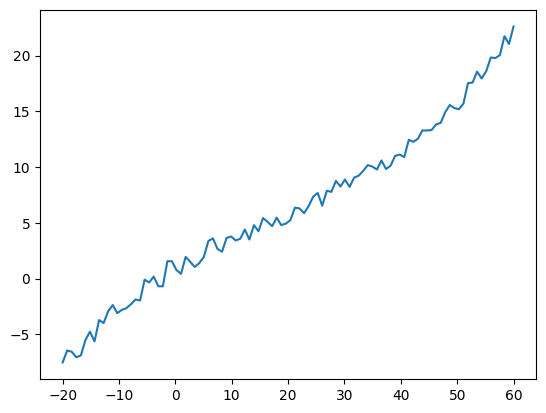

In [225]:


with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)


x = data[:, 0]
y = data[:, 1]
plt.plot(x,y)

In [226]:
def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_0 + theta_1 * x

In [227]:
def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    m = x.shape[0]
    pred_y = h_fun(x, theta_0, theta_1)
    cost = (1 / (2 * m)) * np.sum((pred_y - y) ** 2)
    return cost

In [228]:
eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

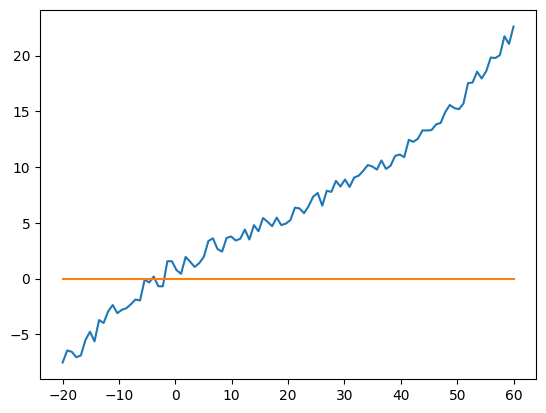

In [229]:
calculate_cost(x, y, theta_0, theta_1)
pred_y = h_fun(x, theta_0, theta_1)
plt.plot(x, y, x, pred_y)

In [230]:
def gradient_descent(x, y, theta_0, theta_1, alpha=alpha, eps=eps, max_iter=10000):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: początkowy parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: początkowy parametr przy xi modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :param max_iter: maksymalna liczba iteracji
    :return: theta_0 i theta_1 - optymalne parametry modelu regresji liniowej
    '''
    m = x.shape[0]
    cost_history = []

    for i in range(max_iter):

        predicted_y = h_fun(x, theta_0, theta_1)

        gradient_theta_0 = (1 / m) * np.sum(predicted_y - y)
        gradient_theta_1 = (1 / m) * np.sum((predicted_y - y) * x)

        theta_0 -= alpha * gradient_theta_0
        theta_1 -= alpha * gradient_theta_1

        cost = calculate_cost(x, y, theta_0, theta_1)
        cost_history.append(cost)

        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta_0, theta_1

0.006487626295089722, 0.315384144897461, 0.6391740798950195


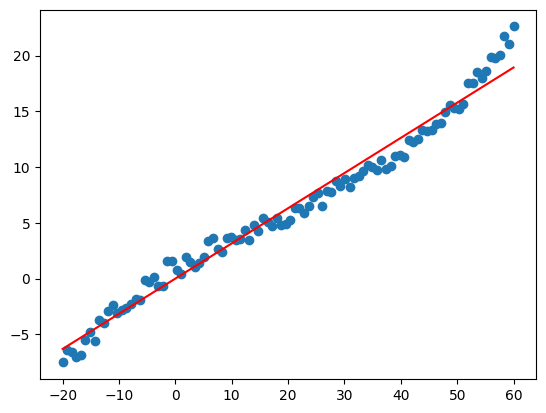

In [231]:
theta_0, theta_1 = gradient_descent(x, y, theta_0, theta_1)
pred_y = h_fun(x, theta_0, theta_1)
plt.scatter(x, y)
plt.plot(x, pred_y, 'r')
print(f'{theta_0}, {theta_1}, {calculate_cost(x, y, theta_0, theta_1)}')

## Regresja liniowa wielu zmiennych


In [232]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

y.shape
X.shape

(2, 100)

In [233]:
def h_fun_ndim(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X
 
def calculate_cost_ndim(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]
    predicted_y = h_fun_ndim(X, theta)
    return  (1 / (2 * m)) * np.sum((predicted_y - y) ** 2)

In [234]:
def gradient_descent_ndim(X, y, theta, alpha=alpha, eps=eps, max_iter=100000):
    '''
    :param X: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta: początkowy parametr modelu regresji liniowej jednej zmiennej
    :param alpha: współczynnik uczenia (learning rate)
    :param eps: tolerancja zmiany kosztu, aby zakończyć iterację
    :return: theta- optymalne parametry modelu regresji liniowej
    '''
    m = x.shape[0]
    cost_history = [] 

    for i in range(max_iter):
        h_y_diff = (h_fun_ndim(X, theta) - y)
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m
        
        cost = calculate_cost_ndim(X, y, theta)
        cost_history.append(cost)

        if i > 0 and abs(cost - cost_history[i-1]) < eps:
            break

    return theta, h_fun_ndim(X, theta)

In [236]:
theta = np.array([[0], [0]])
theta, _ = gradient_descent_ndim(X, y, theta)
pred_y = h_fun_ndim(X, theta)
print(f'{theta},{calculate_cost_ndim(X, y, theta)}')

[[0.00648763]
 [0.31538416]],0.6391738572130962


### Przkład z mieszkaniami

In [237]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T


y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
print(X.shape)
print(y.shape)

(3, 47)
(1, 47)


In [239]:
theta = np.array([[0], [0], [0]])
theta, _ = gradient_descent_ndim(X, y, theta)
# print(X_scale)
example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 270538.7460668062


# Regresja wielomianowa

In [240]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)


x = data[:, 0]
x.shape = [1, -1]
y = data[:, 1]
X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

In [241]:
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

In [242]:
print(y.shape)
print(X.shape)
print(theta.shape)

(1, 100)
(4, 100)
(4, 1)


[[ 0.03589505]
 [ 0.79898561]
 [-0.69851492]
 [ 0.84001292]],0.0002784486352000927


Text(0.5, 1.0, 'Regresja wielomianowa')

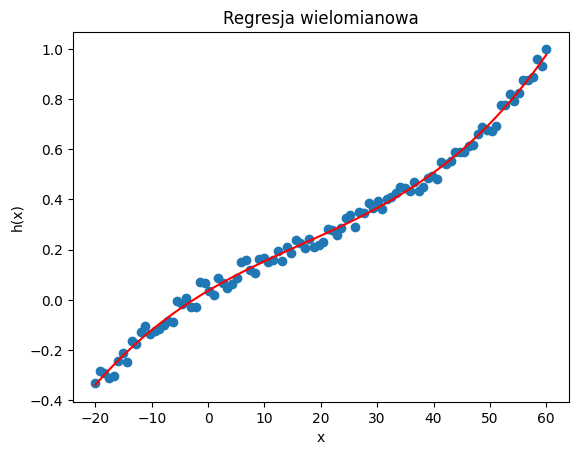

In [243]:
theta = np.array([[0], [0], [0], [0]])
theta, pred_y = gradient_descent_ndim(X, y, theta, alpha, eps)
#pred_y = h_fun_ndim(X, theta)
print(f'{theta},{calculate_cost_ndim(X, y, theta)}')

plt.scatter(x.T, y.T)
plt.plot(x.T, pred_y.T, '-r')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Regresja wielomianowa')
